# Проект «Телеком». Поиск неэффективных операторов.

## Материалы:

Презентация:   

<a href="https://disk.yandex.ru/i/Ekzow1MBsv8JIg"> Проект «Телеком». Поиск неэффективных операторов<b>.pptx</b></a>  


<a href="https://disk.yandex.ru/i/WWuKD9eOZPLe_A"> Проект «Телеком». Поиск неэффективных операторов<b>.pdf</b></a>


Дашборд:   
<a href="https://public.tableau.com/views/Final_proekt_Telecom/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link"> Проект «Телеком». Поиск неэффективных операторов<b>.pdf</b></a>

## Задача

Необходимо определить признаки низкой эффективности опраторов и  помочь заказчику «Нупозвони» найти неэффективных сотрудников у его клиентов (колл-центров). Исследование нужно для разработки нового функционала. Выявление неэффективных сотрудников позволит в дальнейшем увеличить ценность сервиса для клиента, а значит потенциально увеличит время жизни клиента.

## Описание данных  


Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальный телефонии. Его клиенты — колл-центры, которые: 

- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

Колонки в `telecom_dataset.csv`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)

Колонки в `telecom_clients.csv`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентв в сервисе

## План работы

### Шаг 1. Загрузка и изучение данных из файлов.
### Шаг 2. Подготовка данных к исследованию.   
- Предобработка данных: проверить и обработать пропуски и типы данных. 

- Провести категоризация колл-центров. Разбить на те, что распределяют входящие вызовы по своим операторам и те, что обеспечивают исходящие вызовы от операторов.   
  Разделение колл-центров проведем по значению агрегированного параметра `Длительность звонка (без учета времени ожидания)`. Для колл-центров, которые распределяют входящие звонки по своим операторам суммарная длительность звонков направления вызовов `in` будет преобладать над суммарной длительностью звонков направления вызовов `out`. И наоборот.   



### Шаг 3. Исследовательский анализ.  
- Изучить следующие параметры: 
   - количество входящих вызовов и число пропущенных из них,
   - время ожидания ответа при входящих внешних вызовах, 
   - число исходящих вызовов, 
   - долю внутренних вызовов,
   - определить распределение нагрузки на операторов по времени суток и дням недели,
   - проанализировать количества клиентов и их динамику использования услуг провайдера, определить топ-клиентов для заказчика.
- Построить гистограммы для каждого параметра. Посчитать средние значения и медианы.  
- Определить редкие и выбивающиеся значения, определиться как поступить с выбросами.  


### Шаг 4. Изучить результаты анализа.
- Выбрать и предложить возможные критерии неэффективности операторов.  
      
  Критерии для Отзванивающихся колл-центров:
   - среднее количество звонков совершенное оператором в единицу времени (в час). Предварительно минимумом считаем 70% от среднего показателя количества звонков по колл-центру.   
   - доля успешных звонков у оператора. Предварительно минимальный порог закладываем 70% от среднего показателя доли успешных звонков по колл-центру.   
          
  Критерии для Принимающих звонки колл-центров:
   - время ожидания звонка. Также закладываем максимальный порог по колл-центру для определения эффективности. Предварительно не более 30% превышения среднего показателя ожидания по колл-центру. 
   - доля пропущенных звонков. Предварительно максимально допустимой долей пропусков считаем  10% от общего количества принятых оператором звонков.
    
   Проценты порогов единые для модели, но могут скорректироваться при изучении. Все пороговые показатели критериев операторов расчитываем для каждого колл-центра. 
    

- Получить список неэффективных операторов.
- Посмотреть у каких клиентов есть проблемы с эффективностью операторов.
- Определить на сколько мы можем помочь клиентам увеличить эффективность операторов, определяя вовремя неэффективных.
 
### Шаг 5. Проверка статистических гипотез.  
- Первая гипотеза 
  - Нулевая гипотеза - средняя продолжительность исходящих вызовов равна средней продолжительности входящих вызовов 
  - Альтернативная гипотеза - средняя продолжительность исходящих вызовов меньше средней продолжительности входящих вызовов 
- Вторая гипотеза  
  - Нулевая гипотеза - среднее количество вызовов в выходные дни равно среднему количеству вызовов в будни.
  - Альтернативная гипотеза - среднее количество вызовов в выходные дни не равно среднему количеству вызовов в будни.
  

### Шаг 6. Выводы и рекомендации для заказчика.
- Определить масштабы проблемы неэффективных операторов и необходимость в новом алгоритме.
- Предложить пути решения проблемы неэффективности: методы регулярного выявления неэффективных операторов и общего повышения эффективности работы.

### Шаг 7. Ссылки на презентацию и дашборд.

<b>Содержание:</b>

<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-и-изучение-данных-из-файлов." data-toc-modified-id="1. Загрузка и изучение данных из файлов."><span class="toc-item-num"></span>1. Загрузка и изучение данных из файлов.</a></span>
    
<li><span><a href="#2.-Подготовка-данных-к-исследованию." data-toc-modified-id="2. Подготовка данных к исследованию."><span class="toc-item-num"></span>2. Подготовка данных к исследованию.</a></span></li>

<li><span><a href="#3.-Исследовательский-анализ." data-toc-modified-id="3. Исследовательский анализ."><span class="toc-item-num"></span>3. Исследовательский анализ.</a></span></li> 
    
<li><span><a href="#4.-Изучение-результатов-анализа." data-toc-modified-id="4. Изучение результатов анализа."><span class="toc-item-num"> </span>4. Изучение результатов анализа.</a></span></li> 
    
<li><span><a href="#5.-Проверка-статистических-гипотез." data-toc-modified-id="5. Проверка статистических гипотез."><span class="toc-item-num"> </span>5. Проверка статистических гипотез.</a></span></li> 
    
<li><span><a href="#6.-Выводы-и-рекомендации-для-заказчика." data-toc-modified-id="6. Выводы и рекомендации для заказчика."><span class="toc-item-num"> </span>6. Выводы и рекомендации для заказчика.</a></span></li> 
    
<li><span><a href="#7.-Ссылки-на-презентацию-и-дашборд." data-toc-modified-id="7. Ссылки на презентацию и дашборд."><span class="toc-item-num"> </span>7. Ссылки на презентацию и дашборд.</a></span></li>    
             
</div> 

###  1. Загрузка и изучение данных из файлов.

In [1]:
# импорт библиотек 
import os
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# настроим ширину столбцов таблиц и убираем печать предупреждений

pd.set_option("max_colwidth", 150) 

pd.options.mode.chained_assignment = None   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# функция чтение файлов 
def read_file(file_name):
    path1 = os.path.join('/datasets', file_name)
    path2 = os.path.join(file_name)
    if os.path.exists(path1):
        df = pd.read_csv(path1)
        return df
    elif os.path.exists(path2):
        df = pd.read_csv(path2)
        return df
    else:
        print('Файл', file_name,'не найден')

In [4]:
# чтение файла с данными 
data = read_file('telecom_dataset.csv')
clients = read_file('telecom_clients.csv')

In [5]:
# вывод info по файлу и вывод  первых 5 строк таблицы
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
# вывод info по файлу и вывод  первых 5 строк таблицы

clients.info()
clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Изучив данные выявили следующие проблемы.
1. Имеются пропуски в таблице `telecom_dataset`  в `internal` и `operator_id`.
2. Неверные типы данных в таблице `telecom_dataset` у `date` и `internal`.
3. Неверные типы данных в таблице `telecom_clients` у `date_start`.
  
Устраним на следующем шаге.  

### 2. Подготовка данных к исследованию.

####  2.1. Предобработка данных.

In [7]:
# Проверяем на пропуски
data.isna().sum() 

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [8]:
# отображение строк таблицы с пропусками в столбце internal
data[pd.isnull(data['operator_id'])].head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
30,166377,2019-08-13 00:00:00+03:00,in,False,NaN,True,7,0,128
38,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
77,166377,2019-08-22 00:00:00+03:00,in,False,NaN,True,1,0,1


In [9]:
data['operator_id'].isna().mean() 

0.15160847463915997

15% значений `operator_id` не заполнены.  Изучим пропуски  в столбце `operator_id` на предмет является ли вызовы с незаполненными значениями оператора пропущенными вызовами.

In [10]:
data['is_missed_call'][pd.isnull(data['operator_id'])].value_counts()

True     8050
False     122
Name: is_missed_call, dtype: int64

Пропущенными являются 8050 вызовов. Назначим в данных записях параметру `operator_id` значение 0. Будем считать в дальнейшем, что данным вызовам не был назначен оператор, вероятнее всего в связи с занятостью всех операторов.  

In [11]:
# присвом значение 0 пропущенным значениям `operator_id` c пропущенными вызовами

index = data.operator_id.isna()
data.operator_id[index]=np.where(data.is_missed_call[index]==True, 0, data.operator_id[index])
data.isna().sum() 

user_id                  0
date                     0
direction                0
internal               117
operator_id            122
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

In [12]:
data['operator_id'].isna().mean() 

0.002263366850951727

Осталось лишь  0,2% пропусков в `operator_id`. В связи с тем, что не можем достоверно заполнить, удаляем их.

In [13]:
data = data.dropna(subset=['operator_id'], axis = 0)

In [14]:
# отображение строк таблицы с пропусками в столбце internal

data[pd.isnull(data['internal'])].head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,0.0,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,0.0,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,0.0,True,1,0,36
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423
6216,166541,2019-09-26 00:00:00+03:00,in,NaN,908958.0,False,2,547,612
7523,166604,2019-10-31 00:00:00+03:00,in,NaN,0.0,True,1,0,5
7528,166604,2019-11-01 00:00:00+03:00,in,NaN,893402.0,False,1,94,117
8650,166658,2019-09-24 00:00:00+03:00,in,NaN,890404.0,False,1,150,157
9080,166658,2019-10-15 00:00:00+03:00,in,NaN,890404.0,False,1,51,57


In [15]:
data['internal'].value_counts()

False    47513
True      6150
Name: internal, dtype: int64

In [16]:
data['internal'].mean()     

0.11460410338594562

Присвоим пропущенным значениям `internal` которых лишь 0,2% значение False, которое занимает 89% от общего количества. 

In [17]:
data['internal'] = data['internal'].fillna(value = False) 
data.isna().sum() 

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [18]:
# Приводим данные в date и internal к необходимым типам  

data['date'] = pd.to_datetime(data['date'])
data['internal'] = np.where(data['internal'] == True,  True, False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53780 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53780 non-null  int64                                
 1   date                 53780 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53780 non-null  object                               
 3   internal             53780 non-null  bool                                 
 4   operator_id          53780 non-null  float64                              
 5   is_missed_call       53780 non-null  bool                                 
 6   calls_count          53780 non-null  int64                                
 7   call_duration        53780 non-null  int64                                
 8   total_call_duration  53780 non-null  int64                                
dtypes: bool

In [19]:
# Приводим данные в date_start  к необходимому типу  

clients['date_start'] = pd.to_datetime(clients['date_start'])
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [20]:
# Проверяем на дубликаты. 

data.duplicated().sum()

4891

In [21]:
#удаляем дубликаты

data = data.drop_duplicates()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48889 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              48889 non-null  int64                                
 1   date                 48889 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            48889 non-null  object                               
 3   internal             48889 non-null  bool                                 
 4   operator_id          48889 non-null  float64                              
 5   is_missed_call       48889 non-null  bool                                 
 6   calls_count          48889 non-null  int64                                
 7   call_duration        48889 non-null  int64                                
 8   total_call_duration  48889 non-null  int64                                
dtypes: bool

In [23]:
clients.duplicated().sum()

0

Заполнили 98,5% пропусков. Привели в порядок типы данных. Избавились от дубликатов.

####  2.2 Категоризация колл-центров

Разделение колл-центров проведем по значению агрегированного параметра Длительность звонка (без учета времени ожидания). 
При равенстве  длительности звонков, сравним суммарное количество звонков.

In [24]:
data1 = data.groupby(['user_id', 'direction']).agg({'call_duration': 'sum'}).rename(columns={'call_duration':'count'}).reset_index(drop=False)
data1 = data1.assign(idx=data1.groupby('direction').cumcount()).pivot_table(index='user_id', columns='direction', values='count', aggfunc='sum')
data2 = data.groupby(['user_id', 'direction']).agg({'calls_count': 'sum'}).rename(columns={'calls_count':'count'}).reset_index(drop=False)
data2 = data2.assign(idx=data2.groupby('direction').cumcount()).pivot_table(index='user_id', columns='direction', values='count', aggfunc='sum')
clients_cat = clients.merge(data1, on = 'user_id', how = 'left')
clients_cat = clients_cat.merge(data2, on = 'user_id', how = 'left')
clients_cat = clients_cat.fillna(0)
clients_cat = clients_cat.rename(columns = {'in_x': 'in_dur', 'out_x': 'out_dur', 'in_y': 'in_count', 'out_y': 'out_count'}) 
clients_cat['category'] = 0

In [25]:
for n in  range(len(clients_cat)):
    if (clients_cat['in_dur'][n]-clients_cat['out_dur'][n])>0:
        clients_cat['category'][n] = 1
    elif (clients_cat['in_dur'][n]-clients_cat['out_dur'][n])<0:
        clients_cat['category'][n] = 2
    elif ((clients_cat['in_dur'][n]-clients_cat['out_dur'][n])==0) and ((clients_cat['in_count'][n]-clients_cat['out_count'][n])>0):
        clients_cat['category'][n] = 1
    elif ((clients_cat['in_dur'][n]-clients_cat['out_dur'][n])==0) and ((clients_cat['in_count'][n]-clients_cat['out_count'][n])<0):
        clients_cat['category'][n] = 2
    elif ((clients_cat['in_dur'][n]-clients_cat['out_dur'][n])==0) and ((clients_cat['in_count'][n]-clients_cat['out_count'][n])==0):
        clients_cat['category'][n] = 0
clients_cat.head()

,user_id,tariff_plan,date_start,in_dur,out_dur,in_count,out_count,category
0,166713,A,2019-08-15,9420.0,363.0,74.0,10.0,1
1,166901,A,2019-08-23,37223.0,24244.0,845.0,468.0,1
2,168527,A,2019-10-29,0.0,0.0,0.0,0.0,0
3,167097,A,2019-09-01,0.0,0.0,0.0,0.0,0
4,168193,A,2019-10-16,2015.0,4068.0,84.0,117.0,2


In [26]:
clients_cat['category'].value_counts()

0    425
1    174
2    133
Name: category, dtype: int64

In [27]:
# внесем информацию о категориях в таблицу с данными о вызовах
data = data.merge(clients_cat[['user_id','category']], on='user_id')

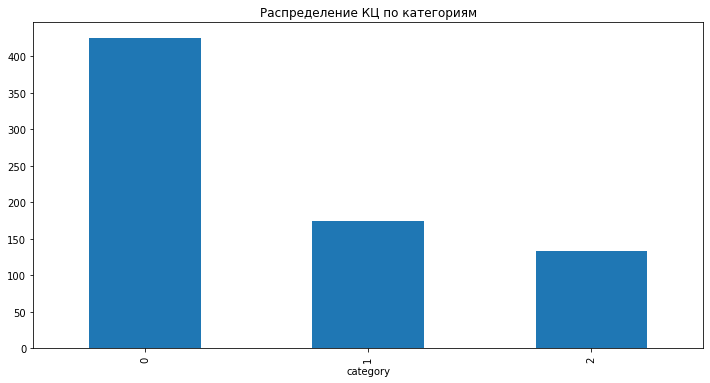

In [28]:
clients_cat.groupby(['category']).agg({'user_id': 'nunique'}).plot.bar(figsize=(12, 6))
plt.legend().remove()
plt.title('Распределение КЦ по категориям');

Присвоили колл-центрам категории. Провели категоризацию по значению агрегированного параметра Длительность звонка (без учета времени ожидания). При равном количестве длительности звонков, сравнивали суммарное количество звонков.
1. Колл-центрам которые распределяют входящие звонки по своим операторам присвоили категорию 1. Таких КЦ 174. 
2. Колл-центрам которые совершают исходящие вызовы силами операторов назначили категорию 2.  Таких КЦ 133.
3. Клиентам зарегестрированным, но не имеющим статистику звонков назначили категорию 0. Таких КЦ  425.

### 3. Исследовательский анализ.  

In [29]:
print('Минимальная дата статистики по звонкам', data['date'].dt.date.min())
print('Максимальная дата статистики по звонкам', data['date'].dt.date.max())
print('')
print('Минимальная дата регистрации КЦ', clients_cat['date_start'].dt.date.min())
print('Максимальная дата регистрации КЦ', clients_cat['date_start'].dt.date.max())

Минимальная дата статистики по звонкам 2019-08-02
Максимальная дата статистики по звонкам 2019-11-28

Минимальная дата регистрации КЦ 2019-08-01
Максимальная дата регистрации КЦ 2019-10-31


In [30]:
# Содаем столбец с порядковым номером месяца 

data['month'] = data['date'].dt.month
clients_cat['month'] = clients_cat['date_start'].dt.month

#### 3.1. Изучение количества входящих вызовов и число пропущенных из них.

In [31]:
# выделяем датасет с данными принимающих вызовы КЦ

data_sort_in = data.query('category == 1 and direction == "in"') 

In [32]:
# изучаем показатель - количество входящих вызовов

data_sort_in['calls_count'].describe()

count    10662.000000
mean         8.865410
std         29.011026
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       1679.000000
Name: calls_count, dtype: float64

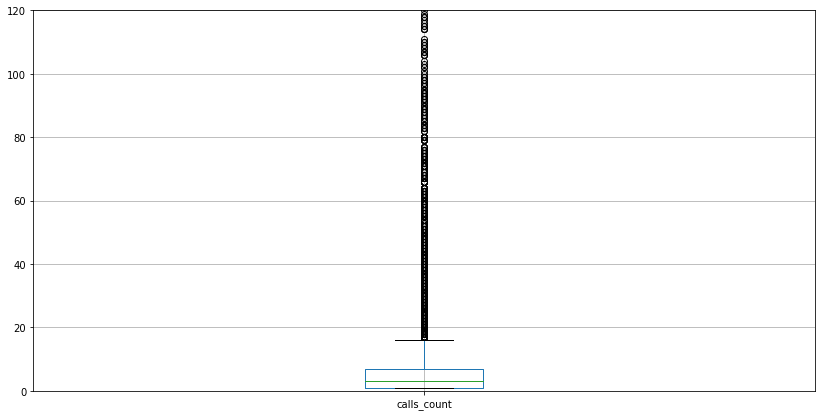

In [33]:
# рассматриваем распределение количесва звонков
plt.figure(figsize=(14,7))
data_sort_in.boxplot(column='calls_count')
plt.ylim(0, 120);

In [34]:
data_sort_in.query('calls_count<=120')['calls_count'].describe()

count    10616.000000
mean         7.848248
std         14.269073
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max        120.000000
Name: calls_count, dtype: float64

In [35]:
print('Рассмотрев распределение количества вызовов, ограничим выборку 120 звонками в день. В эти границы попадает', round(data_sort_in.query('calls_count<=120')['calls_count'].count()/data_sort_in['calls_count'].count()*100,1), '% данных.')

Рассмотрев распределение количества вызовов, ограничим выборку 120 звонками в день. В эти границы попадает 99.6 % данных.


In [36]:
data_sort_in = data_sort_in.query('calls_count<=120')

Изучим количество пропущенных входящих вызовов у КЦ принимающих звонки.

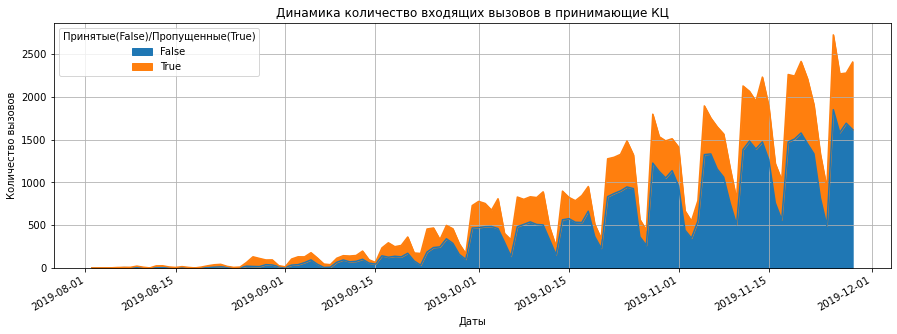

In [37]:
data_sort_in.pivot_table(
    index='date',   
    values='calls_count',  
    columns = 'is_missed_call',
    aggfunc= 'sum'    
).plot.area(figsize=(15, 5), grid=True)
plt.legend(loc='upper left', title = 'Принятые(False)/Пропущенные(True)')
plt.title('Динамика количество входящих вызовов в принимающие КЦ')
plt.xlabel('Даты') 
plt.ylabel('Количество вызовов');

Число вызовов растет в течение рассматриваемого периода, как и число пропущенных звонков. Пропорции относительно стабильны.

In [38]:
print('Доля пропущенных входящих вызовов составляет  ', round(data_sort_in.query('is_missed_call==True')['calls_count'].sum()/data_sort_in['calls_count'].sum()*100,1), '%')

Доля пропущенных входящих вызовов составляет   34.5 %


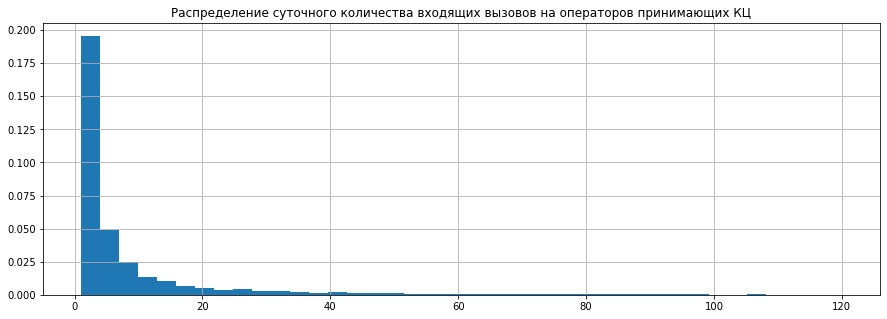

In [39]:
plt.figure(figsize=(15,5))
data_sort_in['calls_count'].hist(density=True, bins=40)
plt.title('Распределение суточного количества входящих вызовов на операторов принимающих КЦ'); 

In [40]:
data_sort_in['calls_count'].describe()

count    10616.000000
mean         7.848248
std         14.269073
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max        120.000000
Name: calls_count, dtype: float64

Рассмотрев распределение количества вызовов У КЦ принимающих звонки, ограничили выборку 120 звонками в день.   
В эти границы попало 99.6 % данных.    
Число вызовов растет в течение рассматриваемого периода, как и число пропущенных звонков. Пропорции относительно стабильны.  
Доля пропущенных входящих вызовов составила 34.5%.   
Среднее равно 8 вызовам в день, медиана - 3.  

#### 3.2. Изучение времени ожидания ответа при входящих внешних вызовах и продолжительности входящих вызовов.

In [41]:
# создаем столбец с показателем времени ожидания ответа оператора

data_sort_in['diff'] = (data_sort_in['total_call_duration'] - data_sort_in['call_duration'])/data_sort_in['calls_count']

In [42]:
# изучаем ожидания ответа оператора

data_sort_in['diff'].describe()

count    10616.000000
mean        17.808069
std         15.714707
min          0.000000
25%          7.333333
50%         14.000000
75%         24.500000
max        294.000000
Name: diff, dtype: float64

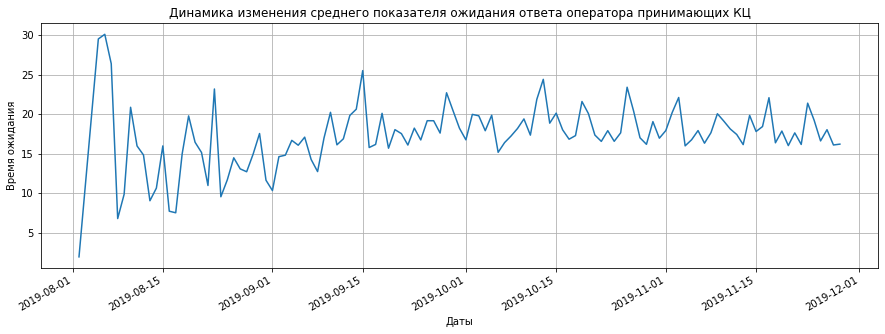

In [43]:
data_sort_in.pivot_table(
    index='date',   
    values='diff',   
    aggfunc='mean'  
).plot(figsize=(15, 5), grid=True)
plt.legend().remove()
plt.title('Динамика изменения среднего показателя ожидания ответа оператора принимающих КЦ')
plt.xlabel('Даты') 
plt.ylabel('Время ожидания');

Среднее ожидание ответа оператора было достаточно волотильно на первом этапе, но затем показатель стабилизировался около 17-18 ед.

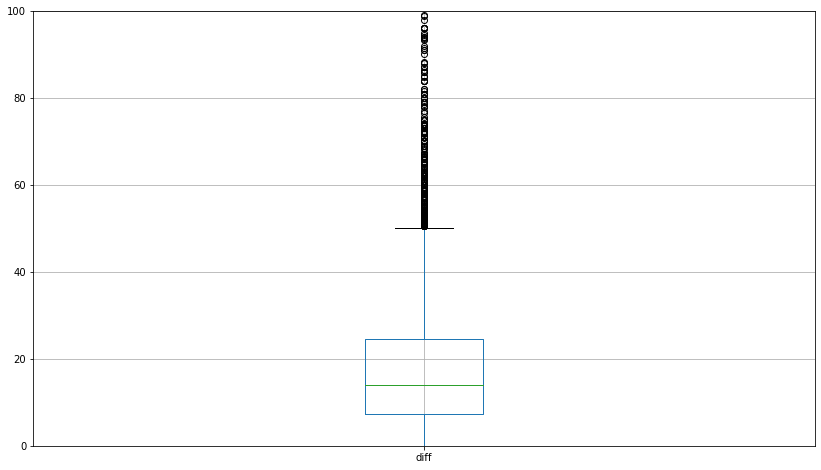

In [44]:
plt.figure(figsize=(14,8))
data_sort_in.boxplot(column='diff')
plt.ylim(0, 100);

In [45]:
data_sort_in.query('diff<=100')['diff'].describe()

count    10582.000000
mean        17.429653
std         14.089922
min          0.000000
25%          7.330044
50%         14.000000
75%         24.237500
max         99.000000
Name: diff, dtype: float64

In [46]:
print('Рассмотрев распределение времени ожидания, ограничим выборку 100 ед. В эти границы попадает', round(data_sort_in.query('diff<=100')['diff'].count()/data_sort_in['diff'].count()*100,1), '% данных.')

Рассмотрев распределение времени ожидания, ограничим выборку 100 ед. В эти границы попадает 99.7 % данных.


In [47]:
data_sort_in = data_sort_in.query('diff<=100')

In [48]:
# создаем столбец с показателем продолжительности одного вызова

data_sort_in['call_dur_one'] = data_sort_in['call_duration']/data_sort_in['calls_count']

In [49]:
# изучаем продолжительность вызова

data_sort_in['call_dur_one'].describe()

count    10582.000000
mean        68.240212
std        104.643199
min          0.000000
25%          0.000000
50%         37.812500
75%         98.312500
max       2325.000000
Name: call_dur_one, dtype: float64

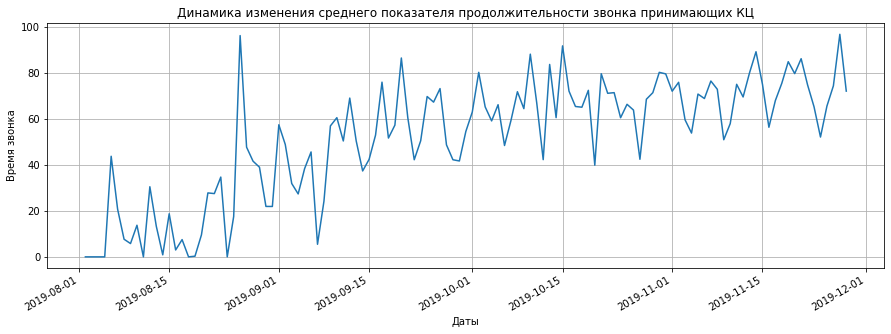

In [50]:
data_sort_in.pivot_table(
    index='date',   
    values='call_dur_one',   
    aggfunc='mean'  
).plot(figsize=(15, 5), grid=True)
plt.legend().remove()
plt.title('Динамика изменения среднего показателя продолжительности звонка принимающих КЦ')
plt.xlabel('Даты') 
plt.ylabel('Время звонка');

Средняя продолжительность звонка росла в период август-сентябрь, в период октябрь-декабрь относительно стабильна.

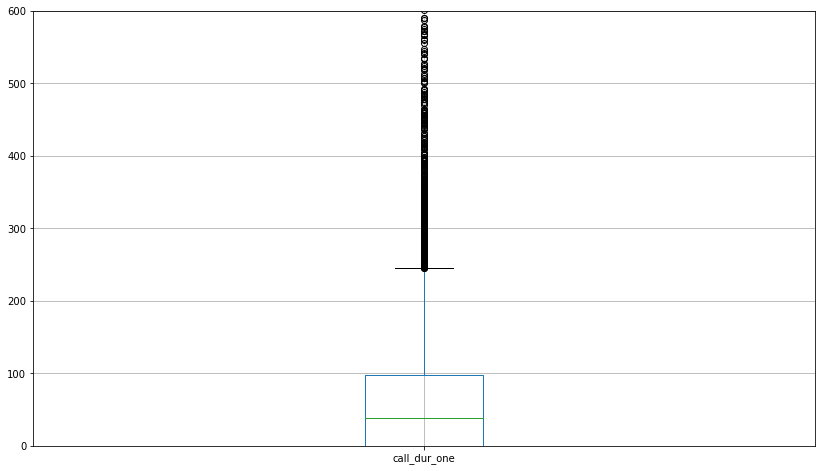

In [51]:
plt.figure(figsize=(14,8))
data_sort_in.boxplot(column='call_dur_one')
plt.ylim(0, 600);

In [52]:
print('Рассмотрев распределение времени звонка, ограничим выборку 600 ед. В эти границы попадает', round(data_sort_in.query('call_dur_one<=600')['call_dur_one'].count()/data_sort_in['call_dur_one'].count()*100,1), '% данных.')

Рассмотрев распределение времени звонка, ограничим выборку 600 ед. В эти границы попадает 99.5 % данных.


In [53]:
data_sort_in = data_sort_in.query('call_dur_one<=600')

Изучив динамику изменения среднего ожидания ответа оператора видим, что среднее ожидание ответа оператора было достаточно волотильно на первом этапе, но затем показатель стабилизировался около 17-18 ед.  
Рассмотрев распределение времени ожидания, ограничили выборку 100 ед. В эти границы попало 99.7 % данных.  
Средний показатель ожидания ответа оператора равен 17 ед., медиана - 14, среднее отклонение - 14.  

Рассмотрев распределение времени звонка, ограничили выборку 600 ед. В эти границы попало 99.5 % данных.  
Средняя продолжительность звонка росла в период август-сентябрь, в период октябрь-декабрь относительно стабильна.  
Средний показатель продолжительности звонка принимающего КЦ равен  68 ед., медиана - 38, среднее отклонение - 105.

При постановке задачи было сказано, что продолжительность вызовов указана в минутах. Но, судя по полученным результатам, мы имеем дело с данными в секундах и будем оперировать этими единицами в дальнейшем.  

#### 3.3. Изучение количества исходящих вызовов и число недозвонов из них.

In [54]:
# выделяем датасет с данными обзванивающих КЦ

data_sort_out = data.query('category == 2 and direction == "out"') 

In [55]:
data_sort_out['calls_count'].describe()

count    22707.000000
mean        24.229489
std         78.955550
min          1.000000
25%          2.000000
50%          6.000000
75%         21.000000
max       4817.000000
Name: calls_count, dtype: float64

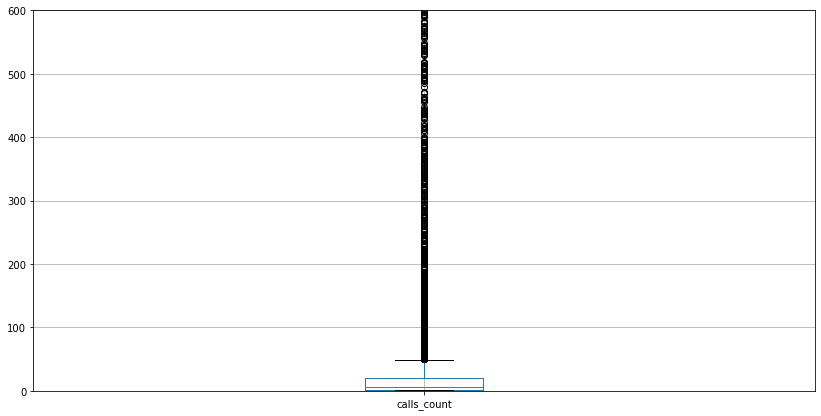

In [56]:
plt.figure(figsize=(14,7))
data_sort_out.boxplot(column='calls_count')
plt.ylim(0, 600);

In [57]:
print('Рассмотрев распределение суточного  числа звонков сделанных операторами обзванивающих КЦ, ограничим выборку 600 звонками. В эти границы попадает', round(data_sort_out.query('calls_count<=600')['calls_count'].count()/data_sort_out['calls_count'].count()*100,1), '% данных.')

Рассмотрев распределение суточного  числа звонков сделанных операторами обзванивающих КЦ, ограничим выборку 600 звонками. В эти границы попадает 99.6 % данных.


In [58]:
data_sort_out = data_sort_out.query('calls_count<=600')

In [59]:
data_sort_out['calls_count'].describe()

count    22625.000000
mean        20.955801
std         47.499955
min          1.000000
25%          2.000000
50%          6.000000
75%         20.000000
max        597.000000
Name: calls_count, dtype: float64

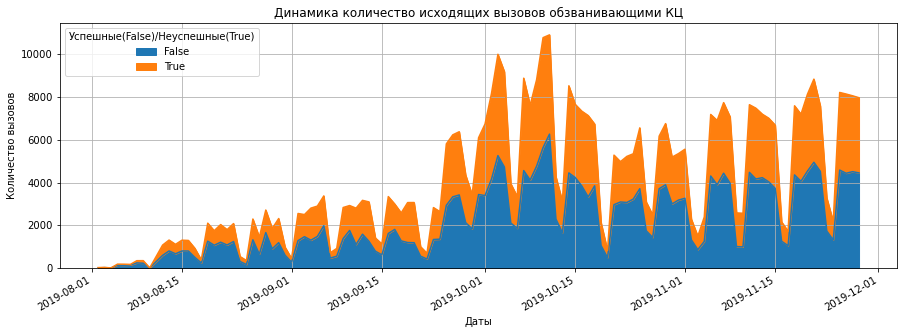

In [60]:
data_sort_out.pivot_table(
    index='date',   
    values='calls_count',  
    columns = 'is_missed_call',
    aggfunc= 'sum'    
).plot.area(figsize=(15, 5), grid=True)
plt.legend(loc='upper left', title = 'Успешные(False)/Неуспешные(True)')
plt.title('Динамика количество исходящих вызовов обзванивающими КЦ')
plt.xlabel('Даты') 
plt.ylabel('Количество вызовов');

In [61]:
print('Доля успешных исходящих вызовов: ', round(data_sort_out.query('is_missed_call==False')['calls_count'].sum()/data_sort_out['calls_count'].sum()*100,1), '%')

Доля успешных исходящих вызовов:  54.7 %


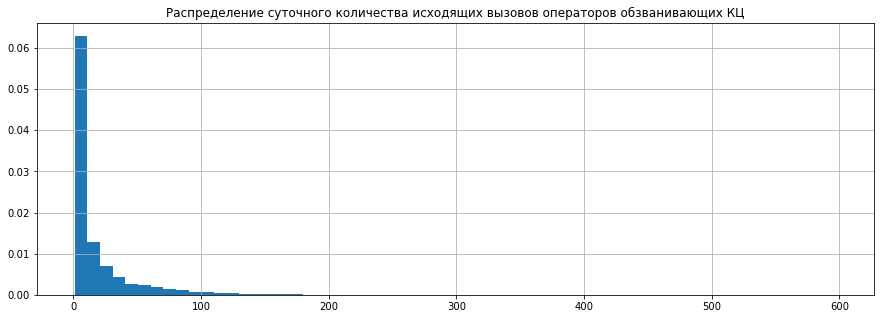

In [62]:
plt.figure(figsize=(15,5))
data_sort_out['calls_count'].hist(density=True, bins=60)
plt.title('Распределение суточного количества исходящих вызовов операторов обзванивающих КЦ'); 

Рассмотрев распределение суточного  числа звонков сделанных операторами обзванивающих КЦ, ограничили выборку 600 звонками. В эти границы попадает 99.6 % данных.  
Число вызовов растет в течение рассматриваемого периода. Но наиболее  заметный всплеск был в первой декаде октября.    
Доля успешных исходящих вызовов:  54.7 %    
Среднее суточный показатель оператора  равен 21 вызову в день, медиана - 6.  

#### 3.4. Изучение  продолжительности исходящих вызовов.

In [63]:
# создаем столбец с показателем продолжительности одного вызова. На этот раз с учетом ожидания.

data_sort_out['call_dur_one'] = data_sort_out['total_call_duration']/data_sort_out['calls_count']

In [64]:
data_sort_out['call_dur_one'].describe()

count    22625.000000
mean        85.885908
std        142.692528
min          0.000000
25%         20.214286
50%         40.000000
75%        102.714286
max       3609.000000
Name: call_dur_one, dtype: float64

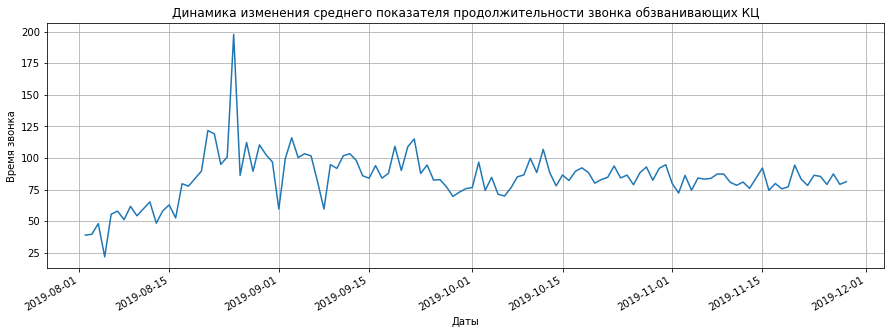

In [65]:
data_sort_out.pivot_table(
    index='date',   
    values='call_dur_one',   
    aggfunc='mean'  
).plot(figsize=(15, 5), grid=True)
plt.legend().remove()
plt.title('Динамика изменения среднего показателя продолжительности звонка обзванивающих КЦ')
plt.xlabel('Даты') 
plt.ylabel('Время звонка');

Средняя продолжительность вызовы обзванивающих КЦ росла в период август-сентябрь и была достаточно волотильна, а после стабилизировалась и стремится к показателю 80 секунд.

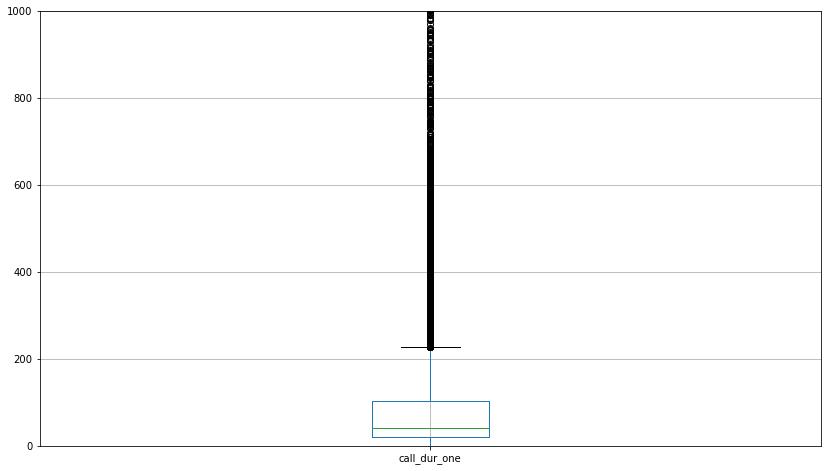

In [66]:
plt.figure(figsize=(14,8))
data_sort_out.boxplot(column='call_dur_one')
plt.ylim(0, 1000);

In [67]:
print('Рассмотрев распределение продолжительности звонков сделанных операторами обзванивающих КЦ, ограничим выборку 1000 секундами. В эти границы попадает', round(data_sort_out.query('call_dur_one<=1000')['call_dur_one'].count()/data_sort_out['call_dur_one'].count()*100,1), '% данных.')

Рассмотрев распределение продолжительности звонков сделанных операторами обзванивающих КЦ, ограничим выборку 1000 секундами. В эти границы попадает 99.6 % данных.


In [68]:
data_sort_out = data_sort_out.query('call_dur_one<=1000')

In [69]:
data_sort_out['call_dur_one'].describe()

count    22530.000000
mean        80.323366
std        110.418070
min          0.000000
25%         20.105974
50%         39.500000
75%        101.800000
max        999.000000
Name: call_dur_one, dtype: float64

Средняя продолжительность звонка обзванивающих КЦ росла в период август-сентябрь и была достаточно волотильна, а после стабилизировалась и стремится к показателю 80 секунд.  
Рассмотрев распределение продолжительности звонков сделанных операторами обзванивающих КЦ, ограничим выборку 1000 секундами. В эти границы попадает 99.6 % данных.  
Средняя продолжительность вызова 80 секунд, медиана равна 39,5 секундам.

#### 3.5. Изучение доли внутренних вызовов.

In [70]:
print('Изучение доли внутренних вызовов в принимающих КЦ')  
print('')      
print('Доля внутренних вызовов среди входящих: ', round(data_sort_in.query('internal == True')['calls_count'].sum()/data_sort_in['calls_count'].sum()*100,1), '%')
print('Доля продолжительности внутренних вызовов: ', round(data_sort_in.query('internal == True')['call_duration'].sum()/data_sort_in['call_duration'].sum()*100,1), '%')
print('Общее количество внутренних входящих вызовов: ', data_sort_in.query('internal == True')['calls_count'].sum(), 'шт.')
print('Общая продолжительность внутренних входящих вызовов: ', data_sort_in.query('internal == True')['call_duration'].sum(), 'сек.')
print('Средняя продолжительность внутренних входящих вызовов: ', round(data_sort_in.query('internal == True')['call_duration'].sum()/data_sort_in.query('internal == True')['calls_count'].sum(),1), 'сек.')
print('') 
print('Изучение доли внутренних вызовов в обзванивающих КЦ')  
print('') 
print('Доля внутренних вызовов среди исходящих: ',  round(data_sort_out.query('internal == True')['calls_count'].sum()/data_sort_out['calls_count'].sum()*100,1), '%')
print('Доля продолжительности внутренних вызовов: ', round(data_sort_out.query('internal == True')['call_duration'].sum()/data_sort_out['call_duration'].sum()*100,1), '%')
print('Общее количество внутренних исходящих вызовов: ', data_sort_out.query('internal == True')['calls_count'].sum(), 'шт.')
print('Общая продолжительность внутренних исходящих вызовов: ', data_sort_out.query('internal == True')['call_duration'].sum(), 'сек.')
print('Средняя продолжительность внутренних исходящих вызовов: ', round(data_sort_out.query('internal == True')['call_duration'].sum()/data_sort_out.query('internal == True')['calls_count'].sum(),1), 'сек.')

Изучение доли внутренних вызовов в принимающих КЦ

Доля внутренних вызовов среди входящих:  1.5 %
Доля продолжительности внутренних вызовов:  0.7 %
Общее количество внутренних входящих вызовов:  1245 шт.
Общая продолжительность внутренних входящих вызовов:  38060 сек.
Средняя продолжительность внутренних входящих вызовов:  30.6 сек.

Изучение доли внутренних вызовов в обзванивающих КЦ

Доля внутренних вызовов среди исходящих:  2.2 %
Доля продолжительности внутренних вызовов:  1.7 %
Общее количество внутренних исходящих вызовов:  10629 шт.
Общая продолжительность внутренних исходящих вызовов:  443427 сек.
Средняя продолжительность внутренних исходящих вызовов:  41.7 сек.


Проанализировав полученные данные можно сделать следующие выводы.  
Доли внутренних вызовов невелика - 1,5% в прнимающих и 2,2% в обзванивающих. Серьезного влияния на выводы не оказывает.   
Доли их средней продолжительности еще меньше 0.7% и 1,7% соответственно.

#### 3.6.  Определение распределения нагрузки на операторов по дням недели.

In [71]:
# создаем столбцы с днем недели
data_sort_in['day_week'] = pd.DatetimeIndex(data_sort_in['date']).weekday   
data_sort_out['day_week'] = pd.DatetimeIndex(data_sort_out['date']).weekday   

day_week
0    14444
1    14904
2    14581
3    15065
4    12033
5     6986
6     5149
Name: calls_count, dtype: int64


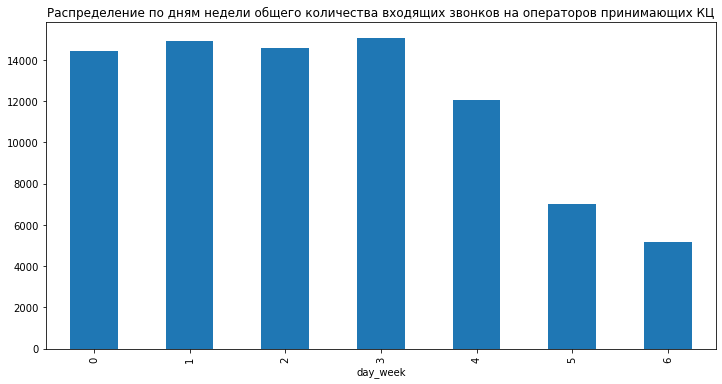

In [72]:
data_in1 = data_sort_in.groupby('day_week')['calls_count'].sum()
print(data_in1)
data_in1.plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели общего количества входящих звонков на операторов принимающих КЦ');

Число входящих вызовов уменьшается с пятницы по воскресенье.

day_week
0    285
1    293
2    283
3    299
4    280
5    161
6    120
Name: operator_id, dtype: int64


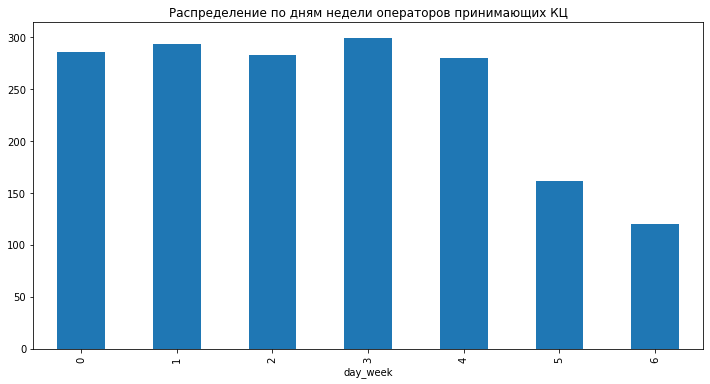

In [73]:
data_in2 = data_sort_in.groupby('day_week')['operator_id'].nunique()
print(data_in2)
data_in2.plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели операторов принимающих КЦ');

В субботу и воскресенье задействовано меньше операторов. Вероятно часть КЦ работает по 5-дневной рабочей неделе. Рассчитаем еще количество вызовов на одного оператора.

day_week
0    50.7
1    50.9
2    51.5
3    50.4
4    43.0
5    43.4
6    42.9
dtype: float64


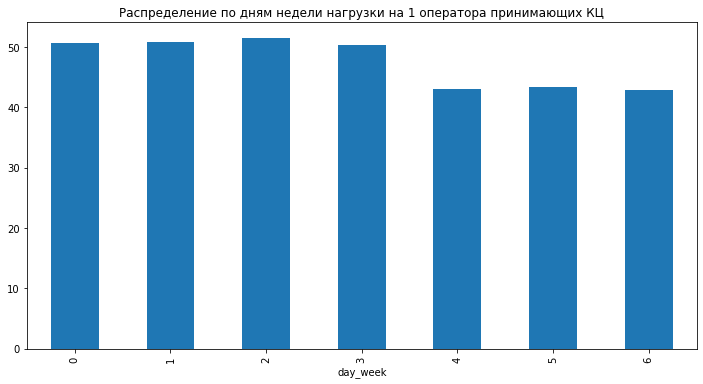

In [74]:
print(round(data_in1/data_in2,1))
(data_in1/data_in2).plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели нагрузки на 1 оператора принимающих КЦ');

Наблюдаем снижение активности в пятницу, субботу и воскресенье. В данные дни количество вызовов на одного оператора меньше на 15%. Количество операторов в эти дни можно еще сократить.

day_week
0    77943
1    79400
2    84936
3    90735
4    82181
5    33624
6    25020
Name: calls_count, dtype: int64


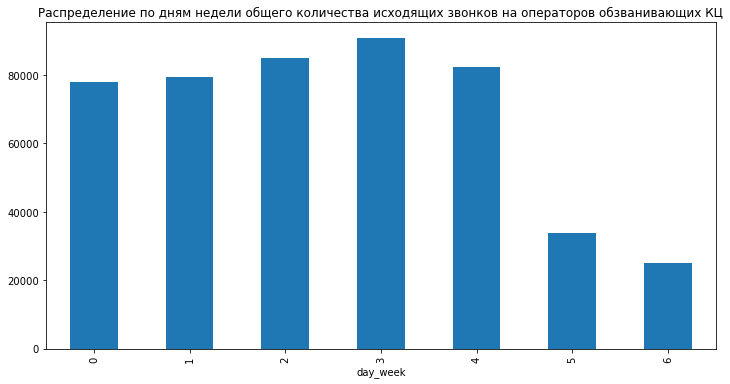

In [75]:
data_out1 = data_sort_out.groupby('day_week')['calls_count'].sum()
print(data_out1)
data_out1.plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели общего количества исходящих звонков на операторов обзванивающих КЦ');

Наблюдаем значительное снижение количества вызовов обзванивающих КЦ в субботу и воскресенье.

day_week
0    471
1    498
2    517
3    509
4    496
5    220
6    161
Name: operator_id, dtype: int64


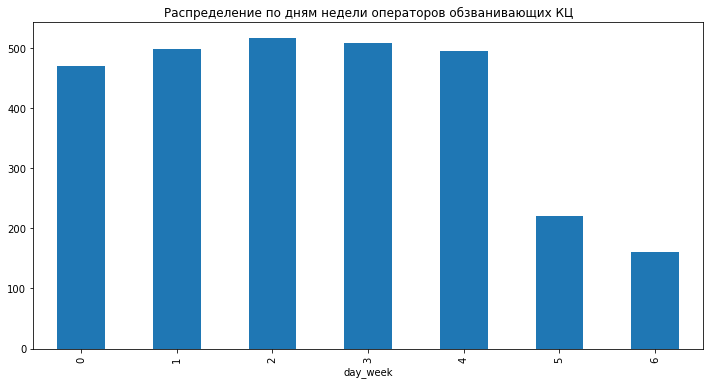

In [76]:
data_out2 = data_sort_out.groupby('day_week')['operator_id'].nunique()
print(data_out2)
data_out2.plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели операторов обзванивающих КЦ');

Наблюдаем снижение числа операторов в субботу и воскресенье визуально пропорциональное снижению числа вызовов. Проверим расчитав число вызовов на оператора.

day_week
0    165.5
1    159.4
2    164.3
3    178.3
4    165.7
5    152.8
6    155.4
dtype: float64


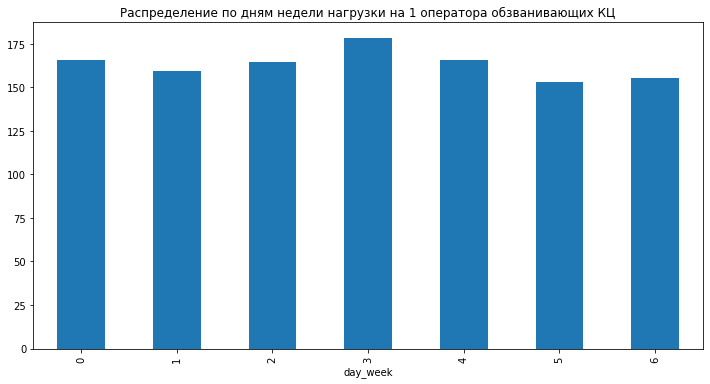

In [77]:
print(round(data_out1/data_out2,1))
(data_out1/data_out2).plot.bar(figsize=(12, 6))
plt.title('Распределение по дням недели нагрузки на 1 оператора обзванивающих КЦ');

В отличие от принимающих КЦ, в обзванивающих КЦ мы не наблюдаем зависимости числа вызовов на оператора от дня недели. Снижение связано лишь с уменьшением операторов в выходные. Часть КЦ работает по 5-дневной неделе. 

#### 3.7. Анализ количества клиентов и их динамики использования услуг провайдера, определение топ-клиентов для заказчика.

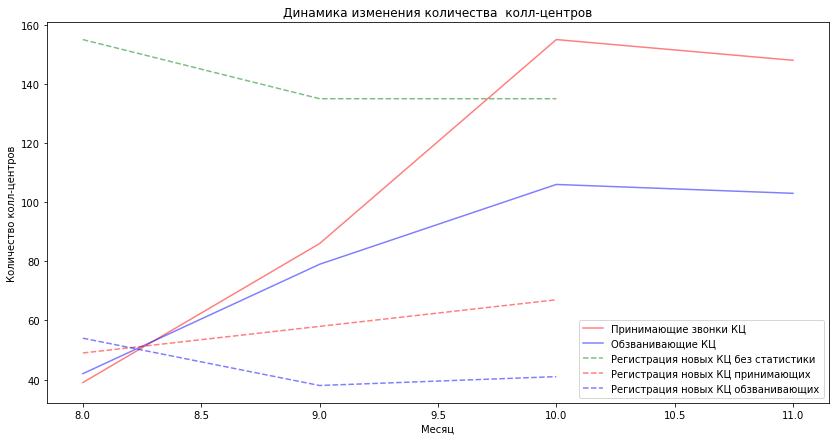

In [78]:
plt.figure(figsize=(14,7))
data_sort_in.groupby('month')['user_id'].nunique().plot(alpha=0.5, color='r', label='Принимающие звонки КЦ')  
data_sort_out.groupby('month')['user_id'].nunique().plot(alpha=0.5,  color='b', label='Обзванивающие КЦ')
clients_cat.query('category==0').groupby('month')['user_id'].nunique().plot(alpha=0.5, color='g', linestyle = '--', label='Регистрация новых КЦ без статистики')
clients_cat.query('category==1').groupby('month')['user_id'].nunique().plot(alpha=0.5, color='r', linestyle = '--', label='Регистрация новых КЦ принимающих')
clients_cat.query('category==2').groupby('month')['user_id'].nunique().plot(alpha=0.5, color='b', linestyle = '--', label='Регистрация новых КЦ обзванивающих')
plt.legend(loc='lower right')
plt.title('Динамика изменения количества  колл-центров')
plt.xlabel('Месяц') 
plt.ylabel('Количество колл-центров');

Пиковое значение количества действующих КЦ  - конец октября,  и сопадает с окончанием  периода регистрации новых КЦ. большая часть зарегистрированных КЦ не имеет статистики. Число КЦ принимающих на 1/3 больше числа КЦ обзванивающих.  
Выделим топ10 КС принимающих звонки и обзванивающих.

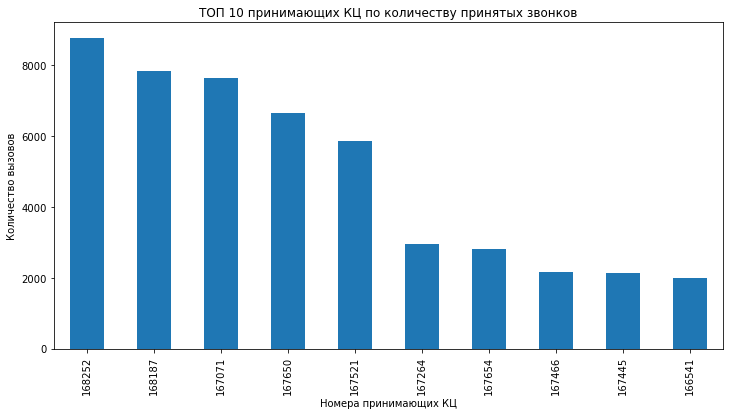

In [79]:
top10_in = data_sort_in.groupby('user_id').agg({'calls_count': 'sum'}).sort_values('calls_count', ascending = False).head(10)
top10_in.plot.bar(figsize=(12,6), label='Принимающие звонки КЦ')
plt.legend().remove()
plt.title('ТОП 10 принимающих КЦ по количеству принятых звонков')
plt.xlabel('Номера принимающих КЦ') 
plt.ylabel('Количество вызовов');

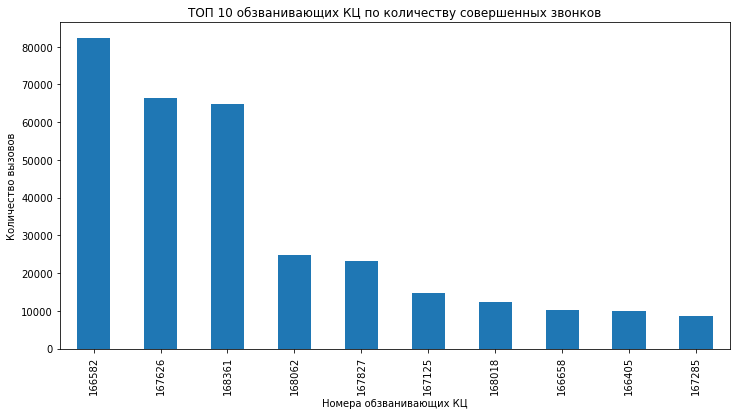

In [80]:
top10_out = data_sort_out.groupby('user_id').agg({'calls_count': 'sum'}).sort_values('calls_count', ascending = False).head(10)
top10_out.plot.bar(figsize=(12,6), label='Принимающие звонки КЦ')
plt.legend().remove()
plt.title('ТОП 10 обзванивающих КЦ по количеству совершенных звонков')
plt.xlabel('Номера обзванивающих КЦ') 
plt.ylabel('Количество вызовов');

### 4. Изучение  результатов анализа.

#### 4.1. Критерии неэффективности операторов

##### 4.1.1. Критерии для Принимающих звонки колл-центров 
  - время ожидания ответа оператора  

In [81]:
# Расчитаем предельную норму ожидания ответа оператора для принимающих КЦ 
norm_diff_in = data_sort_in.query('operator_id != 0 and is_missed_call==True')['diff'].mean()
print('Норма предельного ожидания ответа оператора для принимающих КЦ  :', round(norm_diff_in,1), 'секунд') 

Норма предельного ожидания ответа оператора для принимающих КЦ  : 20.6 секунд


  - доля пропущенных звонков  

In [82]:
# Долю предельного количества пропущенных звонков зададим 5%
norm_pass_in = 0.05

##### 4.1.2. Критерии для обзванивающих КЦ 
  - количество звонков совершенное оператором за рабочий день   

In [83]:
# Задаем константы
# Промежуток между звонками -  посмотреть данные по собеседнику, набрать номер и пр.
between = 150
# Продолжительность рабочего дня в секундах. Возьмем стандартный 8 часовой за вычетом 1 часа на обед
day = 7*3600

# Расчитаем норму суточного количества звонков для оператора обзванивающих КЦ разделив продолжительность рабочего дня
# на сумму средней продолжительности вызова и фиксированного промежутка времени  между звонками.
norm_call_out = round(day/(data_sort_out['call_dur_one'].mean()+between))
print('Норма суточного количества звонков для операторов обзванивающих КЦ :', norm_call_out, 'звонков') 

Норма суточного количества звонков для операторов обзванивающих КЦ : 109 звонков


 - ~~доля успешных звонков у оператора~~ 
 - минимальная продолжительность среднего звонка 

Ранее мы выяснили, что доля успешных звонков составляет 54,7%. 

In [84]:
print('Доля успешных исходящих вызовов: ', round(
    data_sort_out.query('is_missed_call==False')['calls_count'].sum()/data_sort_out['calls_count'].sum()*100,1), '%')

Доля успешных исходящих вызовов:  54.7 %


Но это лишь доля тех, кто в принципе взял трубку. Да и повлиять на данное действие оператор не может.   
Я изменил второй критерий для обзванивающих КЦ, так как основная функция КЦ не просто дозвониться, а донести информацию, а следовательно разговор должен соответствовать какому-то минимальному уровню продолжительности. Зададим его.

In [85]:
# Определим минимальную продолжительность "чистого" среднего звонка, как 
# медиану продолжительности одного "чистого" звонка среди всех обзванивающих КЦ

norm_time_out = (data_sort_out['call_duration']/data_sort_out['calls_count']).median() 
            
print('Норма минимальной продолжительности "чистого" среднего звонка для операторов  обзванивающих КЦ :', round(norm_time_out), 'секунд') 

Норма минимальной продолжительности "чистого" среднего звонка для операторов  обзванивающих КЦ : 14 секунд


#### 4.2. Cписок неэффективных операторов

##### 4.2.1. Список неэффективных операторов  для принимающих КЦ

In [86]:
data_sort_in['pas'] = data_sort_in.query('is_missed_call==True')['calls_count']
operator_in = data_sort_in.query('operator_id!=0').groupby(['operator_id', 'user_id']).agg(
    {'date':'nunique', 'calls_count':'sum', 'call_duration':'sum', 'total_call_duration':'sum', 'pas':'sum'}).reset_index() 
operator_in['diff'] = (operator_in['total_call_duration']-operator_in['call_duration'])/operator_in['calls_count']
operator_in['pas'] = operator_in['pas']/operator_in['calls_count']
operator_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operator_id          388 non-null    float64
 1   user_id              388 non-null    int64  
 2   date                 388 non-null    int64  
 3   calls_count          388 non-null    int64  
 4   call_duration        388 non-null    int64  
 5   total_call_duration  388 non-null    int64  
 6   pas                  388 non-null    float64
 7   diff                 388 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 24.4 KB


In [87]:
operator_in_0 = operator_in.query('diff>=@norm_diff_in or pas>=@norm_pass_in') 
operator_in_0

,operator_id,user_id,date,calls_count,call_duration,total_call_duration,pas,diff
0,882476.0,166391,3,3,192,287,0.000000,31.666667
1,882478.0,166391,1,3,68,144,0.000000,25.333333
5,886892.0,166392,1,2,72,130,0.000000,29.000000
7,888406.0,166669,7,9,499,754,0.111111,28.333333
9,888868.0,166678,10,18,2207,2579,0.055556,20.666667
...,...,...,...,...,...,...,...,...
366,959312.0,166487,12,56,6438,6856,0.125000,7.464286
374,964518.0,168090,1,2,13,55,0.000000,21.000000
375,964666.0,168252,6,43,1897,2475,0.069767,13.441860
382,969288.0,168155,2,3,439,527,0.000000,29.333333


119 операторов из 388 являются недостаточно эффективными в принимающих КЦ. 

##### 4.2.2. Список неэффективных операторов  для  обзванивающих КЦ

In [88]:
operator_out = data_sort_out.query('operator_id!=0').groupby(['operator_id', 'user_id']).agg(
    {'date':'nunique', 'calls_count':'sum', 'call_duration':'sum'}).reset_index()
operator_out['call_out'] = operator_out['calls_count']/operator_out['date']
operator_out['time_out'] = operator_out['call_duration']/operator_out['calls_count']
operator_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   operator_id    624 non-null    float64
 1   user_id        624 non-null    int64  
 2   date           624 non-null    int64  
 3   calls_count    624 non-null    int64  
 4   call_duration  624 non-null    int64  
 5   call_out       624 non-null    float64
 6   time_out       624 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 34.2 KB


In [89]:
operator_out_0 = operator_out.query('call_out<=@norm_call_out or time_out<=@norm_time_out') 
operator_out_0

,operator_id,user_id,date,calls_count,call_duration,call_out,time_out
0,879896.0,166406,49,872,58246,17.795918,66.795872
1,879898.0,166406,82,7209,251038,87.914634,34.822860
2,880020.0,166377,7,38,1946,5.428571,51.210526
3,880022.0,166377,36,189,14635,5.250000,77.433862
4,880026.0,166377,77,2208,151739,28.675325,68.722373
...,...,...,...,...,...,...,...
619,972408.0,166680,1,6,200,6.000000,33.333333
620,972410.0,166680,2,77,3777,38.500000,49.051948
621,972412.0,166680,2,60,3378,30.000000,56.300000
622,972460.0,166940,2,50,1204,25.000000,24.080000


565 операторов из 624 являются недостаточно эффективными в обзванивающих КЦ. 

#### 4.3. Список клиентов, где  есть проблемы с эффективностью операторов

##### 4.3.1. Список  принимающих КЦ c неэффективными операторами

,operator_ttl,operator_ineff
user_id,,
167521,13,6
167176,13,6
167977,6,5
166800,6,5
166732,5,4
166837,9,4
167976,5,4
166975,6,4
167059,8,4


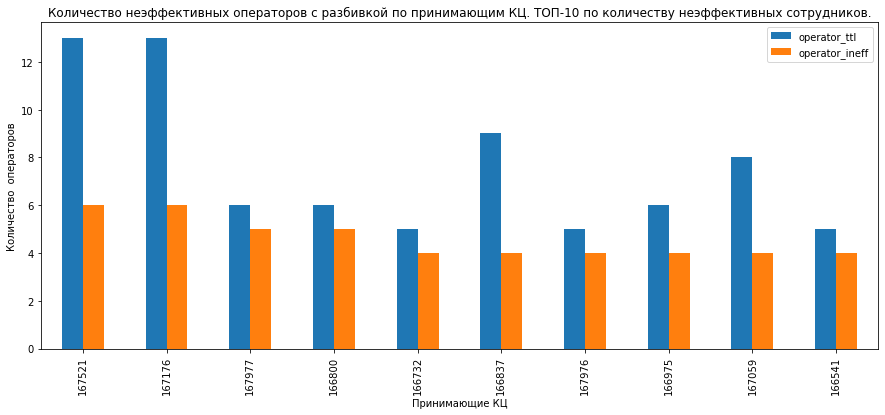

In [90]:
kc_in = operator_in_0.groupby('user_id').agg({'operator_id':'nunique'}).rename(columns={'operator_id':'operator_ineff'})
kc_in['operator_ttl'] = data_sort_in.groupby('user_id').agg({'operator_id':'nunique'})
kc_in = kc_in[['operator_ttl','operator_ineff']]
top10_kc_in = kc_in.sort_values('operator_ineff', ascending = False).head(10)
top10_kc_in.plot.bar(figsize=(15,6), label='Принимающие КЦ')
plt.legend() 
plt.title('Количество неэффективных операторов с разбивкой по принимающим КЦ. ТОП-10 по количеству неэффективных сотрудников.')
plt.xlabel('Принимающие КЦ') 
plt.ylabel('Количество  операторов');
top10_kc_in

##### 4.3.2. Список  обзванивающих КЦ c неэффективными операторами

,operator_ttl,operator_ineff
user_id,,
167497,29,28
168062,28,23
166680,22,21
167626,49,19
166520,18,17
166916,17,16
168091,16,16
166658,17,16
167580,14,14


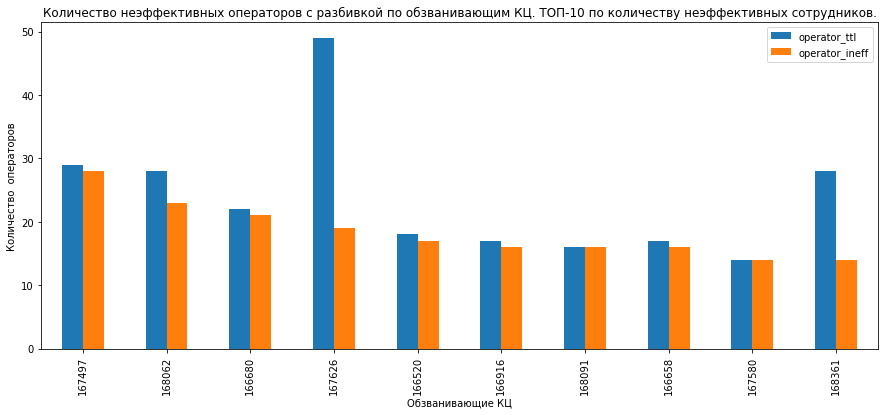

In [91]:
kc_out = operator_out_0.groupby('user_id').agg({'operator_id':'nunique'}).rename(columns={'operator_id':'operator_ineff'})
kc_out['operator_ttl'] = data_sort_out.groupby('user_id').agg({'operator_id':'nunique'})
kc_out = kc_out[['operator_ttl','operator_ineff']]
top10_kc_out = kc_out.sort_values('operator_ineff', ascending = False).head(10)
top10_kc_out.plot.bar(figsize=(15,6), label='Обзванивающие КЦ')
plt.legend() 
plt.title('Количество неэффективных операторов с разбивкой по обзванивающим КЦ. ТОП-10 по количеству неэффективных сотрудников.')
plt.xlabel('Обзванивающие КЦ') 
plt.ylabel('Количество  операторов');
top10_kc_out

#### 4.4. Причины низкой эффективности.

Причины низкой эффективности у операторов принимающих КЦ. 

In [92]:
print('Доля из отсеянных операторов с проблемой длительного ожидания ответа - ', round(operator_in.query('diff>=@norm_diff_in')['operator_id'].count()/operator_in.query('diff>=@norm_diff_in or pas>=@norm_pass_in')['operator_id'].count()*100, 1), '%')

Доля из отсеянных операторов с проблемой длительного ожидания ответа -  82.4 %


In [93]:
print('Доля из отсеянных операторов с проблемой большого числа пропусков звонков - ', round(operator_in.query('pas>=@norm_pass_in')['operator_id'].count()/operator_in.query('diff>=@norm_diff_in or pas>=@norm_pass_in')['operator_id'].count()*100, 1), '%')

Доля из отсеянных операторов с проблемой большого числа пропусков звонков -  30.3 %


 Причины низкой эффективности у операторов обзванивающих КЦ. 

In [94]:
print('Доля из отсеянных операторов с проблемой недостаточного количества совершенных вызовов - ', round(operator_out.query('call_out<=@norm_call_out')['operator_id'].count()/operator_out.query('call_out<=@norm_call_out or time_out<=@norm_time_out')['operator_id'].count()*100, 1), '%')

Доля из отсеянных операторов с проблемой недостаточного количества совершенных вызовов -  99.3 %


In [95]:
print('Доля из отсеянных операторов с проблемой малой продолжительности звонков - ', round(operator_out.query('time_out<=@norm_time_out')['operator_id'].count()/operator_out.query('call_out<=@norm_call_out or time_out<=@norm_time_out')['operator_id'].count()*100, 1), '%')

Доля из отсеянных операторов с проблемой малой продолжительности звонков -  14.2 %


### 5. Проверка статистических гипотез.

#### 5.1. Первая гипотеза
Нулевая гипотеза - средняя продолжительность исходящих вызовов равна средней продолжительности входящих вызовов  
Альтернативная гипотеза - средняя продолжительность исходящих вызовов меньше средней продолжительности входящих вызовов

In [96]:
data['one_call'] = data['call_duration']/data['calls_count']
ultra_value = data.query('direction == "in"')['one_call']

alpha = .05 

results = st.ttest_ind(data.query('direction == "out"')['one_call'], ultra_value, equal_var = False)

print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
if (results.pvalue / 2 < alpha) and (data.query('direction == "out"')['one_call'].mean() < ultra_value.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.834888552464747e-06
Отвергаем нулевую гипотезу


In [97]:
data.query('direction == "in"')['one_call'].mean()

68.6368769214056

In [98]:
data.query('direction == "out"')['one_call'].mean()

63.82245923237345

<b> Нулевая гипотеза опровергнута.</b>  
Высока вероятность того, что средняя продолжительность исходящих вызовов меньше средней продолжительности входящих. Медианы различаются менее чем на 10%, но разница статистически значима.  

#### 5.2. Вторая гипотеза
Нулевая гипотеза - среднее количество вызовов на одного оператора в выходные дни равно среднему количеству вызовов в будни.  
Альтернативная гипотеза - среднее количество вызовов в выходные дни не равно среднему количеству вызовов в будни.

In [99]:
data['day_week'] = pd.DatetimeIndex(data['date']).weekday 
alpha = .05
results = st.ttest_ind(data.query('day_week == 5 or day_week == 6')['calls_count'], data.query('day_week != 5 and day_week != 6')['calls_count'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1054051058687241
Не получилось отвергнуть нулевую гипотезу


In [100]:
data.query('day_week == 5 or day_week == 6')['calls_count'].mean()

17.44296724470135

In [101]:
data.query('day_week != 5 and day_week != 6')['calls_count'].mean()

16.36685050001144

<b>Нулевая гипотеза подтверждена.</b>  
Высока вероятность того, что среднее количество вызовов на одного оператора в выходные дни и будни одинаковые. Разница не является статистически значимой.

### 6. Выводы и рекомендации для заказчика.

<b> Изучение данных и предобработка </b>  

Изучив данные выявили следующие проблемы.
 - Имеются пропуски в таблице telecom_dataset в internal и operator_id.
 - Неверные типы данных в таблице telecom_dataset у date и internal.
 - Неверные типы данных в таблице telecom_clients у date_start.  
 
Заполнили 98,5% пропусков. Привели в порядок типы данных. Избавились от дубликатов.  


Присвоили колл-центрам категории. Провели категоризацию по значению агрегированного параметра Длительность звонка (без учета времени ожидания). При равном количестве длительности звонков, сравнивали суммарное количество звонков.
 - Колл-центрам которые распределяют входящие звонки по своим операторам присвоили категорию 1. Таких КЦ 174.
 - Колл-центрам которые совершают исходящие вызовы силами операторов назначили категорию 2. Таких КЦ 133.
 - Клиентам зарегестрированным, но не имеющим статистику звонков назначили категорию 0. Таких КЦ 425.  
 
<b>Исследовательский анализ</b>  

1. <b>Изучение количества входящих вызовов и число пропущенных из них.  </b>  
Рассмотрев распределение количества вызовов у КЦ принимающих звонки, ограничили выборку 120 звонками в день.  
В эти границы попало 99.6 % данных.  
Число вызовов растет в течение рассматриваемого периода, как и число пропущенных звонков. Пропорции относительно стабильны.  
Доля пропущенных входящих вызовов составила 34.5%.  
Среднее равно 8 вызовам в день, медиана - 3.    

2. <b>Изучение времени ожидания ответа при входящих внешних вызовах и продолжительности входящих вызовов.  </b>  
Изучив динамику изменения среднего ожидания ответа оператора видим, что среднее ожидание ответа оператора было достаточно волотильно на первом этапе, но затем показатель стабилизировался около 17-18 ед.  
Рассмотрев распределение времени ожидания, ограничили выборку 100 ед. В эти границы попало 99.7 % данных.  
Средний показатель ожидания ответа оператора равен 17 ед., медиана - 14, среднее отклонение - 14.  
Рассмотрев распределение времени звонка, ограничили выборку 600 ед. В эти границы попало 99.5 % данных.  
Средняя продолжительность звонка росла в период август-сентябрь, в период октябрь-декабрь относительно стабильна.  
Средний показатель продолжительности звонка принимающего КЦ равен 68 ед., медиана - 38, среднее отклонение - 105.  
<i>При постановке задачи было сказано, что продолжительность вызовов указана в минутах. Но, судя по полученным результатам, мы имеем дело с данными в секундах и будем оперировать этими единицами в дальнейшем.</i>  

3. <b> Изучение количества исходящих вызовов и число недозвонов из них.</b>    
Рассмотрев распределение суточного числа звонков сделанных операторами обзванивающих КЦ, ограничили выборку 600 звонками. В эти границы попадает 99.6 % данных.  
Число вызовов растет в течение рассматриваемого периода. Но наиболее заметный всплеск был в первой декаде октября.  
Доля успешных исходящих вызовов: 54.7 %  
Среднее суточный показатель оператора равен 21 вызову в день, медиана - 6.  

4. <b>Изучение продолжительности исходящих вызовов.</b>  
Средняя продолжительность звонка обзванивающих КЦ росла в период август-сентябрь и была достаточно волотильна, а после стабилизировалась и стремится к показателю 80 секунд.  
Рассмотрев распределение продолжительности звонков сделанных операторами обзванивающих КЦ, ограничим выборку 1000 секундами. В эти границы попадает 99.6 % данных.  
Средняя продолжительность вызова 80 секунд, медиана равна 39,5 секундам.  

5. <b>Изучение доли внутренних вызовов.</b>
Проанализировав полученные данные можно сделать следующие выводы.    
Доли внутренних вызовов невелика - 1,5% в прнимающих и 2,2% в обзванивающих. Серьезного влияния на выводы не оказывает.    
Доли их средней продолжительности еще меньше  0.7% и 1,7% соответственно.    

6. <b>Определение распределения нагрузки на операторов по дням недели.</b>  
<b>Принимающие КЦ:   </b>  
Число входящих вызовов уменьшается с пятницы по воскресенье.  
В субботу и воскресенье задействовано меньше операторов. Вероятно часть КЦ работает по 5-дневной рабочей неделе.   
Рассчитав количество вызовов на одного оператора наблюдаем снижение активности в пятницу, субботу и воскресенье. В данные дни количество вызовов на одного оператора меньше на 15%. Количество операторов в эти дни можно еще сократить.  
<b>Обзванивающие КЦ:  </b>  
Наблюдаем значительное снижение количества вызовов обзванивающих КЦ в субботу и воскресенье.  
Наблюдаем снижение числа операторов в субботу и воскресенье визуально пропорциональное снижению числа вызовов.   
Расчитали число вызовов на оператора. В отличие от принимающих КЦ, в обзванивающих КЦ мы не наблюдаем зависимости числа вызовов на оператора от дня недели. Снижение связано лишь с уменьшением операторов в выходные. Часть КЦ работает по 5-дневной неделе.  

7. <b>Анализ количества клиентов и их динамики использования услуг провайдера, определение топ-клиентов для заказчика.</b>  
Пиковое значение количества действующих КЦ - конец октября, и сопадает с окончанием периода регистрации новых КЦ. большая часть зарегестрированных КЦ не имеет статистики. Число КЦ принимающих на 1/3 больше числа КЦ обзванивающих.
Выделили топ10 КС принимающих звонки и обзванивающих.  

<b>Изучение результатов анализа.</b>

1. <b>Критерии для Принимающих звонки колл-центров</b>
- время ожидания ответа оператора  
Норма предельного ожидания ответа оператора для принимающих КЦ  : 20.6 секунд  
- доля пропущенных звонков  
Долю предельного количества пропущенных звонков задали - 5%  

2. <b>Критерии для обзванивающих КЦ</b>  
- количество звонков совершенное оператором за рабочий день  
Норма суточного количества звонков для операторов обзванивающих КЦ : 109 звонков
- минимальная продолжительность среднего звонка  
Норма минимальной продолжительности "чистого" среднего звонка для операторов  обзванивающих КЦ : 14 секунд  

3. <b>Cписок неэффективных операторов</b>  

119 операторов из 388 являются недостаточно эффективными в принимающих КЦ.  
Доля из отсеянных операторов с проблемой длительного ожидания ответа -  82.4 %  
Доля из отсеянных операторов с проблемой большого числа пропусков звонков -  30.3 %  

565 операторов из 624 являются недостаточно эффективными в обзванивающих КЦ.  
Доля из отсеянных операторов с проблемой недостаточного количества совершенных вызовов -  99.3 %  
Доля из отсеянных операторов с проблемой малой продолжительности звонков -  14.2 %  

4. <b>Определили для каждого  КЦ число неэффективных операторов. Выделили ТОП-10 для каждого типа КЦ.  </b>

<b>Проверка статистических гипотез.</b>  
1. Первая гипотеза  
 - Нулевая гипотеза - средняя продолжительность исходящих вызовов равна средней продолжительности входящих вызовов  
 - Альтернативная гипотеза - средняя продолжительность исходящих вызовов меньше средней продолжительности входящих вызовов   
 
Нулевая гипотеза опровергнута.
Высока вероятность того, что средняя продолжительность исходящих вызовов меньше средней продолжительности входящих. Медианы различаются менее чем на 10%, но разница статистически значима.  

2. Вторая гипотеза
 - Нулевая гипотеза - среднее количество вызовов на одного оператора в выходные дни равно среднему количеству вызовов в будни.
 - Альтернативная гипотеза - среднее количество вызовов в выходные дни не равно среднему количеству вызовов в будни.
   
Нулевая гипотеза подтверждена.  
Высока вероятность того, что среднее количество вызовов на одного оператора в выходные дни и будни одинаковые. Разница не является статистически значимой.  

<b>Рекомендации для заказчика:</b>
- есть ярко выраженная потребность в алгоритме определения неэффективных операторов 
- наиболее проблематичными являются обзванивающие КЦ, им и стоит в первую очередь предложить данную опцию. В частности клиенты 167497, 168062, 166680.
- большая часть зарегистрированных КЦ не преиступило к работе, а именно 425 из 732. Возможно предложение нового алгоритма позволит скорее вовлечь данных клиентов в работу.

### 7. Ссылки на презентацию и дашборд.

Презентация:   

<a href="https://disk.yandex.ru/i/Ekzow1MBsv8JIg"> Проект «Телеком». Поиск неэффективных операторов<b>.pptx</b></a>  


<a href="https://disk.yandex.ru/i/WWuKD9eOZPLe_A"> Проект «Телеком». Поиск неэффективных операторов<b>.pdf</b></a>


Дашборд:   
<a href="https://public.tableau.com/views/Final_proekt_Telecom/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link"> Проект «Телеком». Поиск неэффективных операторов<b>.pdf</b></a>

